In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
import gseapy as gp
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA

In [ ]:
# Reading the file into a dataframe
file = "43587_2024_572_MOESM11_ESM.xlsx"

sheets = pd.read_excel(file, sheet_name=None)

In [ ]:
#Fig 1b, 1g-h, and 1m are the important ones, highlighting transcriptomics, proteomics, and metaboliomics
sheets.keys()

dict_keys(['Extended Data Fig 1b', 'Extended Data Fig 1d', 'Extended Data Fig 1g-h', 'Extended Data Fig 1k', 'Extended Data Fig 1m'])

In [56]:
# Segmenting what each part we want to analyze into their own dataframes
# All tables are similar, with having first two rows be nothing then the table
# So start reading at the 3 row
transcript = sheets['Extended Data Fig 1b'][1:]
proteins = sheets['Extended Data Fig 1g-h'][1:]
metabolimics = sheets['Extended Data Fig 1m'][1:]

In [59]:
transcript.iloc[0,0]

'Genes names'

In [68]:
# This cleans the transcript table, setting the first column
# to be the index and then removing the first two blank rows
if transcript.iloc[0,0] == 'Genes names':
   
    #Take the first two rows, set the index to the first column
    transcript.columns = transcript.iloc[0]
    transcript = transcript.set_index(transcript.columns[0])
    transcript = transcript[1:]

    # Make sure the table is all numbers and not strings
    transcript = transcript.apply(pd.to_numeric, errors='coerce')
else:
    print("Transcript Table Already Clean")

transcript


Transcript Table Already Clean


1,2-16-A,2-16-D,2-16-R,2-16-T,2-18-A,2-18-D,2-18-R,2-18-T,2-20-A,2-20-D,...,3-4-T,3-7-A,3-7-D,3-7-R,3-7-T,F-A,F-D,F-R,F-T,Average
Genes names,,,,,,,,,,,,,,,,,,,,,
A1CF,2.919161,0.818505,0.898932,7.047423,8.516385,1.921141,3.702799,2.533168,6.164409,6.629778,...,8.102981,0.338646,2.949231,2.626652,3.694100,5.807363,0.957221,0.424012,1.858392,4.959252
A4GALT,20.191836,21.931819,19.829763,16.381777,18.666224,26.084845,31.663439,22.288708,19.326626,15.933239,...,15.115398,21.043088,23.388962,15.778318,17.869061,14.801394,21.341784,27.510828,22.230170,20.388670
AAAS,21.977486,17.177612,12.013416,20.894892,26.191219,22.697576,22.329424,20.723074,24.269922,22.635015,...,30.438648,19.142039,27.264017,31.582314,23.415146,27.886452,22.841766,30.473398,17.435181,23.379908
AACS,16.589739,12.973910,7.937718,19.567291,24.184907,17.272147,20.031992,16.394612,19.350073,13.821409,...,40.680395,12.176946,12.914070,29.562497,22.802305,16.280183,6.390602,8.067762,7.150808,18.608709
AADAT,1.670095,1.248359,2.312795,3.243973,2.607915,2.318798,1.976999,2.235828,3.133924,3.300966,...,5.626459,2.514506,2.063896,4.363030,2.913697,1.990690,3.100486,4.339637,2.260258,3.111858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,9.879239,7.906566,7.604562,10.523804,9.089731,8.117340,8.722162,6.648719,6.893890,10.009964,...,10.745696,7.950098,8.492898,12.081805,8.365174,8.429867,9.090944,13.037477,7.204315,9.347926
ZYG11B,7.690692,4.315668,5.682372,16.736190,14.715278,7.107900,9.579220,7.631582,12.019502,13.859089,...,12.774833,7.995443,4.920945,6.771033,8.785712,8.484677,2.185604,0.742861,3.171297,11.240266
ZYX,72.405138,92.613006,152.178976,81.950152,56.346047,129.186510,101.603799,66.961835,50.221696,56.133102,...,52.567067,138.916329,58.602234,95.339998,48.791020,41.937338,95.694881,94.905449,131.383608,81.258653


In [76]:

transcript.iloc[0]

1
2-16-A     2.919161
2-16-D     0.818505
2-16-R     0.898932
2-16-T     7.047423
2-18-A     8.516385
             ...   
F-A        5.807363
F-D        0.957221
F-R        0.424012
F-T        1.858392
Average    4.959252
Name: A1CF, Length: 83, dtype: float64

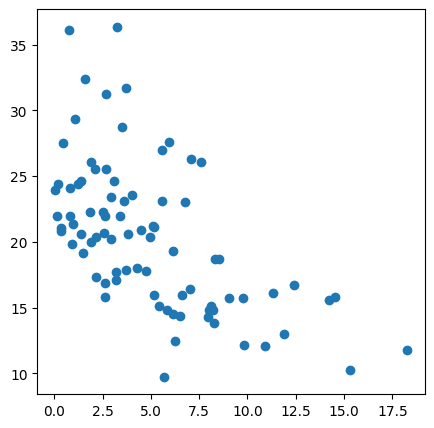

In [ ]:
# I want to scatter plot 2 random genes with all the samples
plt.figure(figsize=(5,5))
plt.scatter(transcript.iloc[0],transcript.iloc[1])

plt.show()